## Libraries

In [1]:
import warnings
#data manipulation
import pandas as pd
import numpy as np
#data visualization
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
#normalization
from sklearn.preprocessing import MinMaxScaler
#machine learning algorithm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
warnings.filterwarnings('ignore', category=FutureWarning)

## Data Prepation

In [3]:
#read data &check
df=pd.read_csv('/kaggle/input/framingham-heart-study/framingham_heart_study.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


With that previous block, we can see that all of our data are numerical data.

### Data Cleaning

In [5]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [6]:
new_col_names={'male':'gender','currentSmoker':'is_current_smoker','cigsPerDay':'cigs_per_day','BPMed':'use_blood_pressure_medication','prevalentStroke':'had_stroke',
              'prevalentHyp':'had_hypertension','diabetes':'has_diabetes','totChol':'total_cholesterol','sysBP':'systolic_bp'
              ,'diaBP':'diastolic_bp','BMI':'bmi','heartRate':'heart_rate',
              'TenYearCHD':'ten_year_chd'}
df.rename(columns=new_col_names,inplace=True)
df.columns

Index(['gender', 'age', 'education', 'is_current_smoker', 'cigs_per_day',
       'BPMeds', 'had_stroke', 'had_hypertension', 'has_diabetes',
       'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate',
       'glucose', 'ten_year_chd'],
      dtype='object')

In [7]:
#check null values
df.isna().sum()

gender                 0
age                    0
education            105
is_current_smoker      0
cigs_per_day          29
BPMeds                53
had_stroke             0
had_hypertension       0
has_diabetes           0
total_cholesterol     50
systolic_bp            0
diastolic_bp           0
bmi                   19
heart_rate             1
glucose              388
ten_year_chd           0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isna().sum()

gender               0
age                  0
education            0
is_current_smoker    0
cigs_per_day         0
BPMeds               0
had_stroke           0
had_hypertension     0
has_diabetes         0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

### Data Visualization

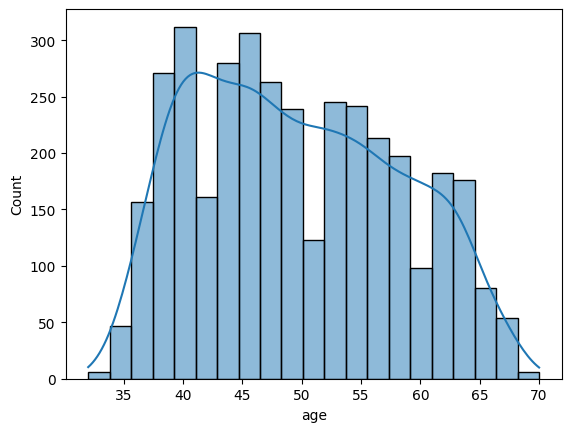

In [9]:
sns.histplot(data=df['age'],kde=True)
plt.show()

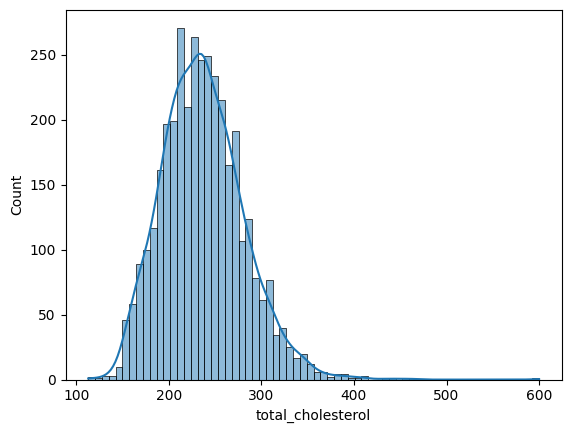

In [10]:
sns.histplot(data=df['total_cholesterol'],kde=True)
plt.show()

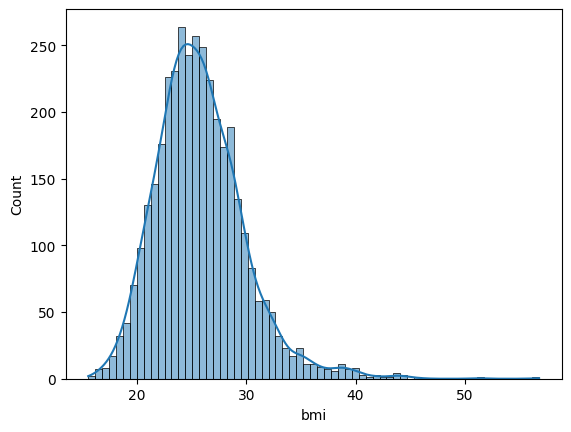

In [11]:
sns.histplot(x='bmi',data=df,kde=True)
plt.show()

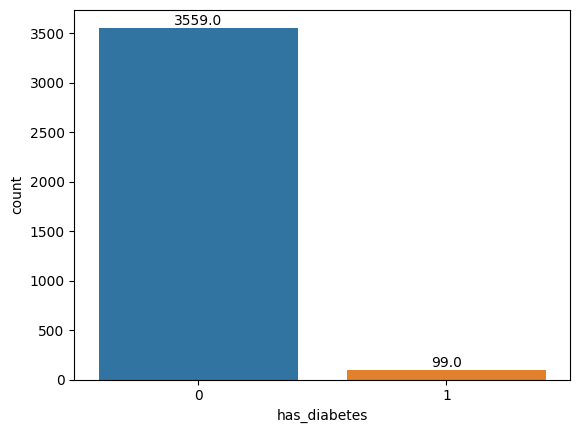

In [12]:
ax=sns.countplot(x='has_diabetes',data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom')
plt.show()

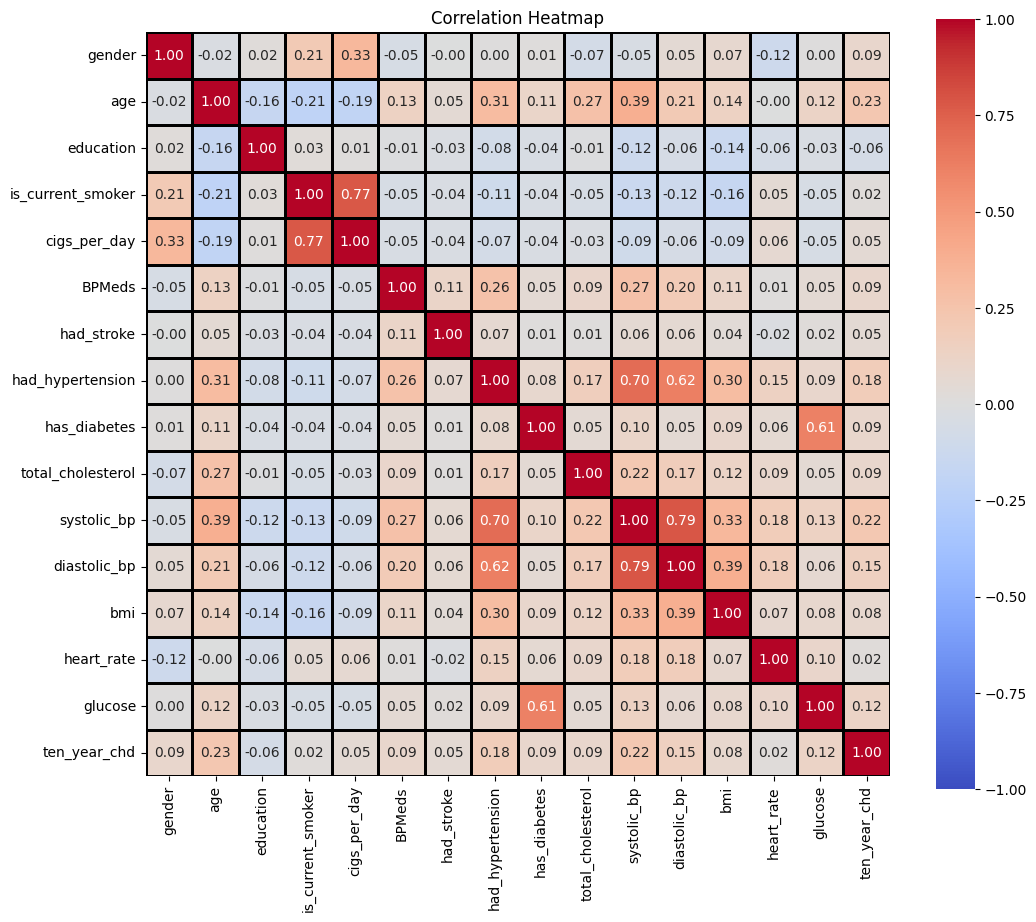

In [13]:
#correlation heatmap
plt.figure(figsize=(12,10))
correlation_matrix=df.corr()
sns.heatmap(data=correlation_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1,linewidths=2,fmt='.2f',linecolor='black',square=True)
plt.title('Correlation Heatmap')
plt.show()

### Identifying Outliers

In [14]:
# Assuming `df` is your DataFrame
# Calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers while keeping values of 1 unchanged
for column in df.columns:
    df[column] = df[column].where(
        (df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column]) | (df[column] == 1),
        other=df[column].clip(lower=lower_bound[column], upper=upper_bound[column])
    )

# Display the first 10 rows of the modified DataFrame
df.head(10)

,gender,age,education,is_current_smoker,cigs_per_day,BPMeds,had_stroke,had_hypertension,has_diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


### Normalization

In order to enhance the machine learning algorithm, we are going to use the min-max normalization method. This technique reduces the data to a range of [0, 1]. 

In [15]:
scaler=MinMaxScaler()
normalized_data=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
normalized_data.head(10)

,gender,age,education,is_current_smoker,cigs_per_day,BPMeds,had_stroke,had_hypertension,has_diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
0,1.0,0.184211,1.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.326754,0.223464,0.291667,0.571167,0.589286,0.468750,0.0
1,0.0,0.368421,0.333333,0.0,0.00,0.0,0.0,0.0,0.0,0.567982,0.372439,0.475000,0.659922,0.857143,0.453125,0.0
2,1.0,0.421053,0.000000,1.0,0.40,0.0,0.0,0.0,0.0,0.546053,0.436996,0.458333,0.488969,0.500000,0.359375,0.0
3,0.0,0.763158,0.666667,1.0,0.60,0.0,0.0,1.0,0.0,0.458333,0.660459,0.708333,0.652358,0.321429,0.875000,1.0
4,0.0,0.368421,0.666667,1.0,0.46,0.0,0.0,0.0,0.0,0.721491,0.461825,0.525000,0.376009,0.678571,0.593750,0.0
5,0.0,0.289474,0.333333,0.0,0.00,0.0,0.0,1.0,0.0,0.471491,0.958411,0.958333,0.739095,0.535714,0.812500,0.0
6,0.0,0.815789,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.370614,0.541279,0.308333,0.880799,0.232143,0.593750,1.0
7,0.0,0.342105,0.333333,1.0,0.40,0.0,0.0,0.0,0.0,0.844298,0.163873,0.308333,0.304400,0.571429,0.484375,0.0
8,1.0,0.526316,0.000000,0.0,0.00,0.0,0.0,1.0,0.0,0.611842,0.576040,0.608333,0.540406,0.517857,0.500000,0.0
9,1.0,0.289474,0.000000,1.0,0.60,0.0,0.0,1.0,0.0,0.458333,0.779640,0.908333,0.401727,0.821429,0.640625,0.0


## Train-Test Split

In this section for ML algorithms to learn, we divide the data into train and test sets, but first we select our features and label the data.

In [16]:
X=normalized_data.loc[:'ten_year_chd'].drop(columns='ten_year_chd')#features
y=normalized_data['ten_year_chd']#label
print(f'feature names: {X.columns} \n, shape:{X.shape}')
print(f'label name: {y.name}, shape:{y.shape}')

feature names: Index(['gender', 'age', 'education', 'is_current_smoker', 'cigs_per_day',
       'BPMeds', 'had_stroke', 'had_hypertension', 'has_diabetes',
       'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate',
       'glucose'],
      dtype='object') 
, shape:(3658, 15)
label name: ten_year_chd, shape:(3658,)


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f'X_train:{X_train.shape}, X_test:{X_test.shape}')
print(f'y_train:{y_train.shape},y_test:{y_test.shape}')

X_train:(2926, 15), X_test:(732, 15)
y_train:(2926,),y_test:(732,)


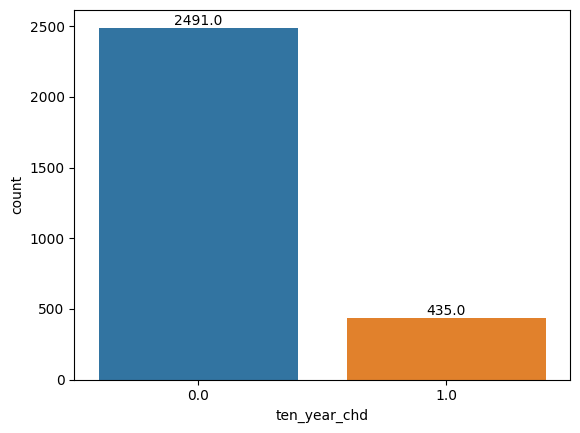

In [18]:
ax=sns.countplot(x=y_train)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom')
plt.show()

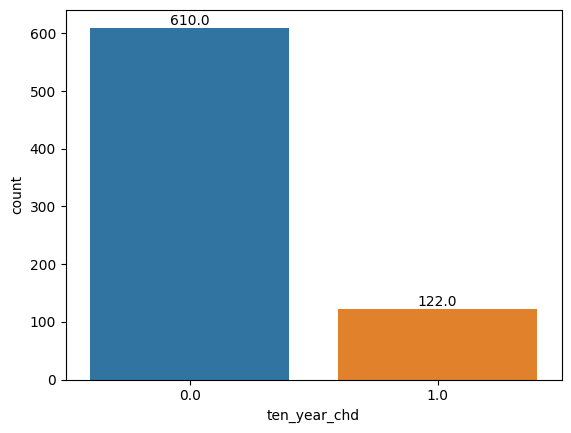

In [19]:
ax=sns.countplot(x=y_test)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='bottom')
plt.show()

##

## Models

### performance metrics plot function

In [20]:
def plot_roc_curve(y_test, y_scores):
    """
    Plots the ROC curve and calculates the AUC.
    
    Parameters:
        y_test (array-like): True labels for the test set.
        y_scores (array-like): Predicted probabilities for the positive class.
    """
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    sns.lineplot(x=fpr, y=tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    sns.lineplot(x=[0, 1], y=[0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    # Set the title and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add legend
    plt.legend(loc='lower right')

    # Add grid for better readability
    plt.grid(linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()

In [21]:
def plot_confusion_matrix(y_true, y_pred, labels=['No CHD', 'CHD']):
    """
    Plots the confusion matrix.
    
    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        labels (list): List of label names for the confusion matrix.
    """
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)

    # Set the title and labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Show the plot
    plt.show()

### Logistic Regression

In [23]:
# choosing the hyperparameters 
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
#Grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Best parameters and performance
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


Based on the preceding results, the ideal hyperparameters for our model will be:
* C : 1
* penalty : l1
* solver : liblinear

In [24]:
# Fitting logistic regression to the training set
logistic_regression_classifier=LogisticRegression(C=1,penalty='l1',solver='liblinear',random_state=0)
logistic_regression_classifier.fit(X_train,y_train)
#Predicting the test results
y_pred_logistic_regression=logistic_regression_classifier.predict(X_test)
accuracy_log=accuracy_score(y_test,y_pred_logistic_regression)
print('Accuracy Score: ',accuracy_log)

Accuracy Score:  0.8387978142076503


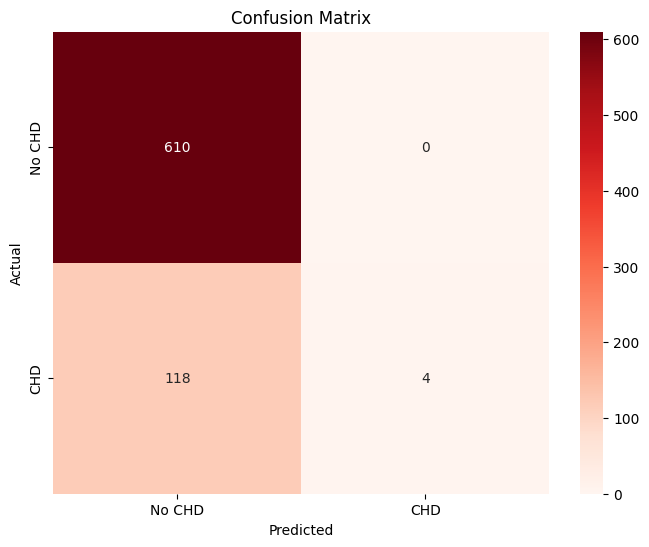

In [25]:
#confusion matrix
plot_confusion_matrix(y_test, y_pred_logistic_regression)

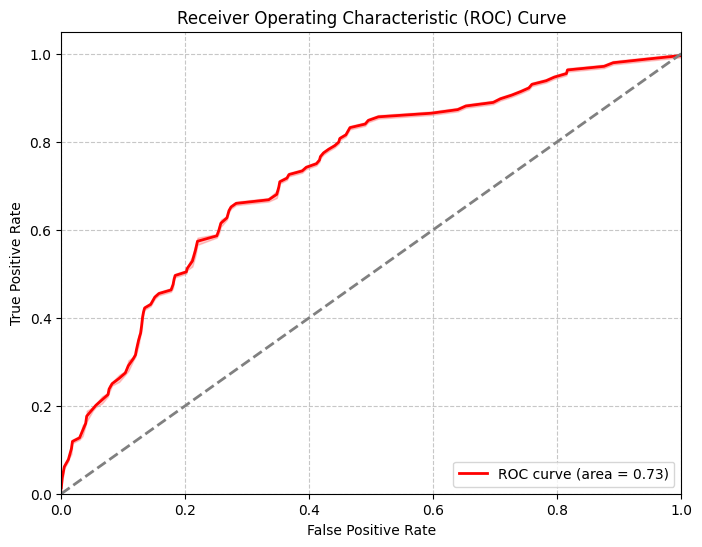

In [26]:
# Extract probabilities for the positive class
y_scores = logistic_regression_classifier.predict_proba(X_test)[:, 1]

# Call the function to plot the ROC curve
plot_roc_curve(y_test, y_scores)

### Support Vector Machine(SVM)

In [27]:
# choosing the hyperparameters 
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'coef0': [0, 1]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]},
]
# Grid Search
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'coef0': 1, 'degree': 4, 'kernel': 'poly'}


Based on the preceding results, the ideal hyperparameters for our model will be:
* C : 0.1
* coef0 : 1
* degree : 4
kernel : Polynomial


In [28]:
svm_classifier=SVC(kernel='poly', C=0.1, degree=4, coef0=1,probability=True ,random_state=42)
svm_classifier.fit(X_train,y_train)
y_pred_svm=svm_classifier.predict(X_test)
accuracy_svm=accuracy_score(y_test,y_pred_svm)
print('Accuracy Score: ',accuracy_svm)

Accuracy Score:  0.837431693989071


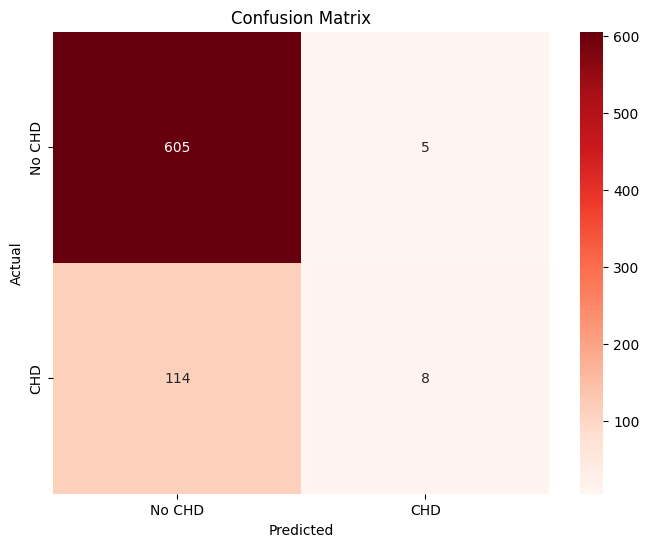

In [29]:
#confusion matrix
plot_confusion_matrix(y_test, y_pred_svm)

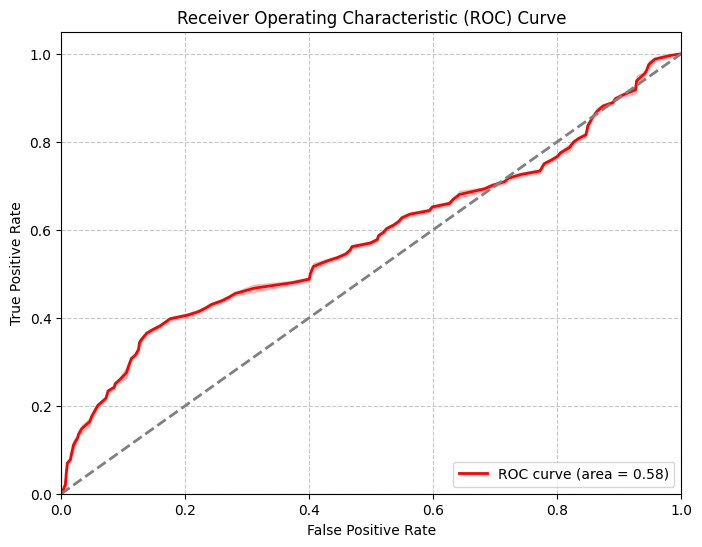

In [30]:
# Extract probabilities for the positive class
y_scores = svm_classifier.predict_proba(X_test)[:, 1]

# Call the function to plot the ROC curve
plot_roc_curve(y_test, y_scores)

### Naive Bayes

In [31]:
# Define parameter grid
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Exploring a range of values
}

# Perform Grid Search
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)

Best parameters: {'var_smoothing': 0.657933224657568}


Based on the preceding results, the ideal hyperparameters for our model will be:
* var_smoothing: 0.657933224657568

In [32]:
nb_classifier=GaussianNB(var_smoothing= 0.657933224657568)
nb_classifier.fit(X_train,y_train)
y_pred_nb=nb_classifier.predict(X_test)
accuracy_nb=accuracy_score(y_test,y_pred_nb)
print('Accuracy Score: ',accuracy_nb)

Accuracy Score:  0.8346994535519126


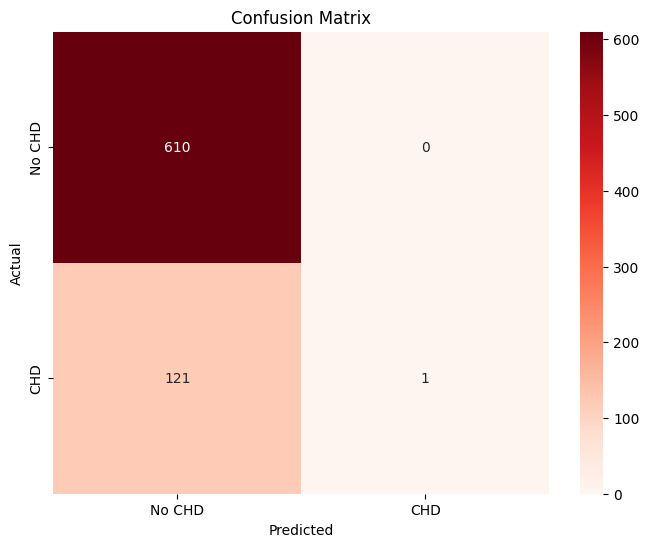

In [33]:
#confusion matrix
plot_confusion_matrix(y_test, y_pred_nb)

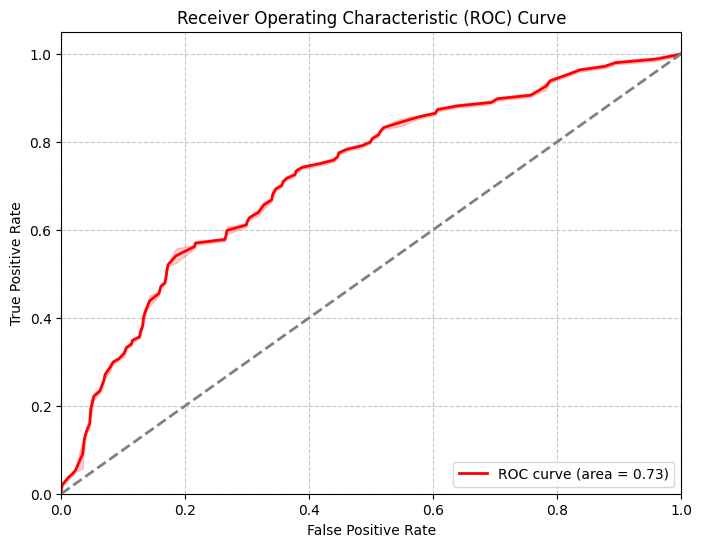

In [34]:
# Extract probabilities for the positive class
y_scores = nb_classifier.predict_proba(X_test)[:, 1] 

# Call the function to plot the ROC curve
plot_roc_curve(y_test, y_scores)

### Decision Tree

In [35]:
# choosing the hyperparameters 
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
#Grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Best parameters and performance
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}


Based on the preceding results, the ideal hyperparameters for our model will be:
* max_depth : 5
* max_features : auto
* min_samples_split : 5
* min_samples_leaf : 2

In [36]:
# Create and fit the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5,max_features='auto',min_samples_leaf=2,min_samples_split=5)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)  # Use predict() method

# Calculate the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy score
print('Accuracy Score:', accuracy_dt)

Accuracy Score: 0.8237704918032787


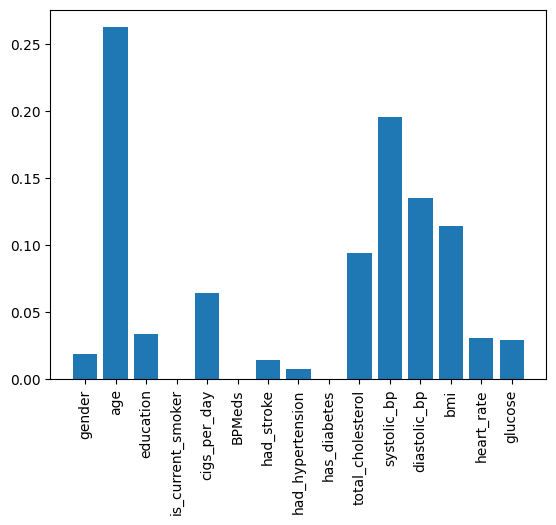

In [37]:
feature_importances = dt_classifier.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
plt.show()

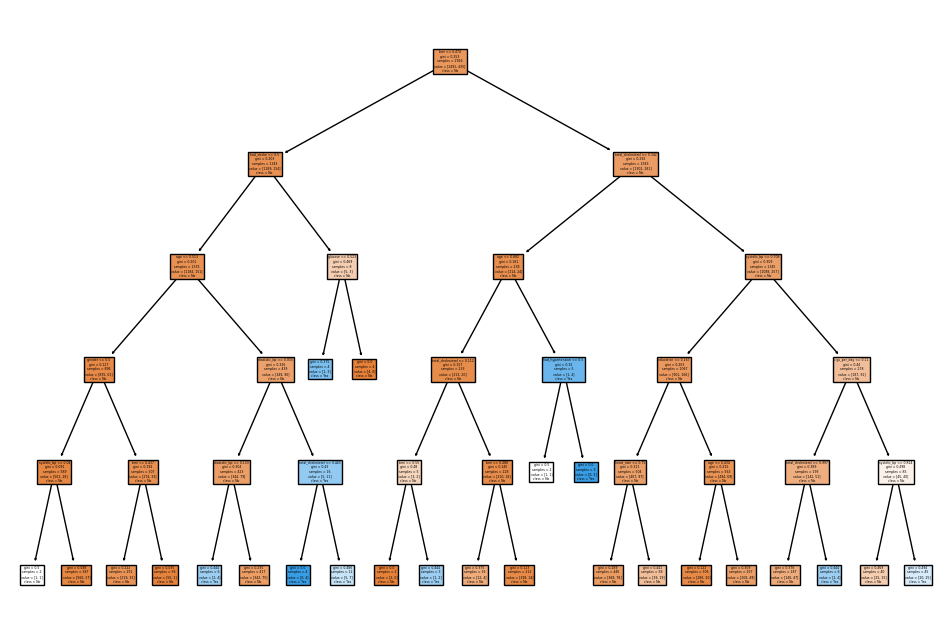

In [38]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

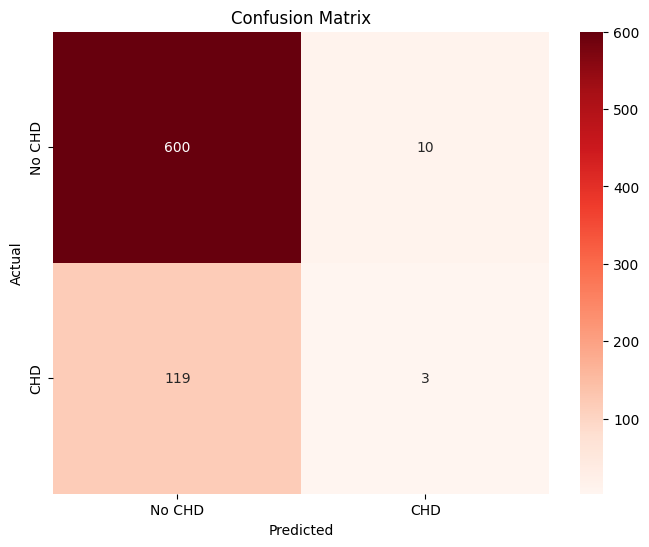

In [39]:
#confusion matrix
plot_confusion_matrix(y_test, y_pred_dt)

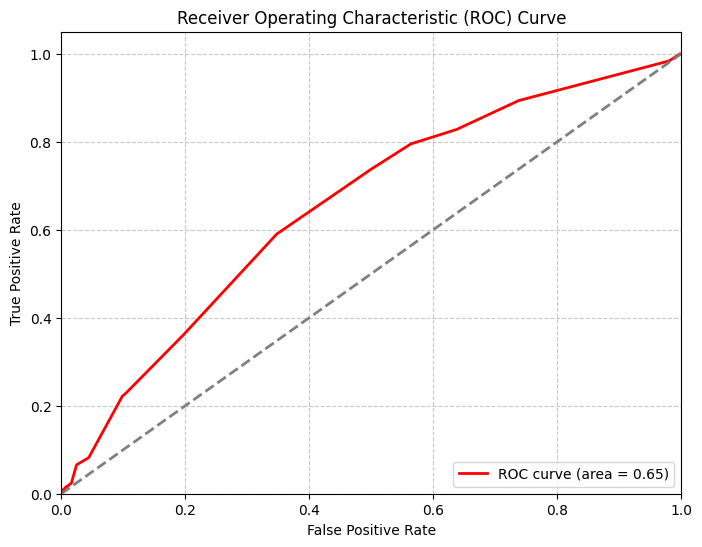

In [40]:
# Extract probabilities for the positive class
y_scores = dt_classifier.predict_proba(X_test)[:, 1]

# Call the function to plot the ROC curve
plot_roc_curve(y_test, y_scores)

### Gradient Boosting

In [41]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

# Perform Grid Search
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 1.0}


Based on the preceding results, the ideal hyperparameters for our model will be:
* max_depth : 5
* min_samples_split : 2
* min_samples_leaf : 2
* n_estimators : 200
* learning_rate : 0.01
* subsample=0.8

In [43]:
# Create the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(learning_rate=0.01,max_depth=5,min_samples_leaf=2,min_samples_split=2,n_estimators=200,subsample=0.8)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print('Accuracy Score:', accuracy_gb)

Accuracy Score: 0.837431693989071


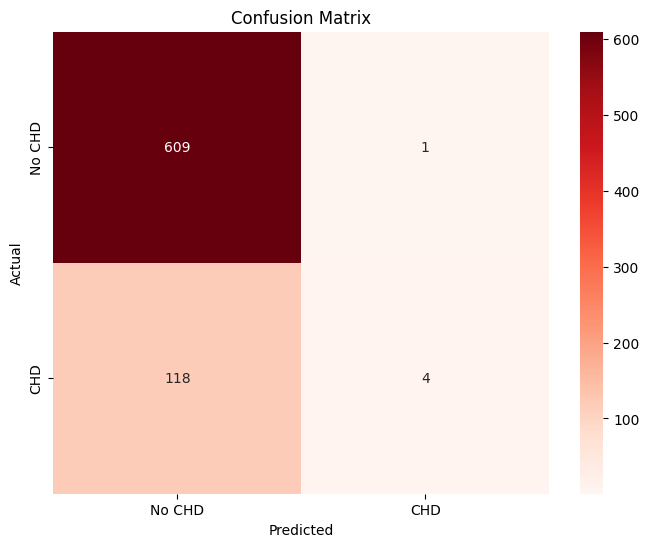

In [44]:
#confusion matrix
plot_confusion_matrix(y_test, y_pred_gb)

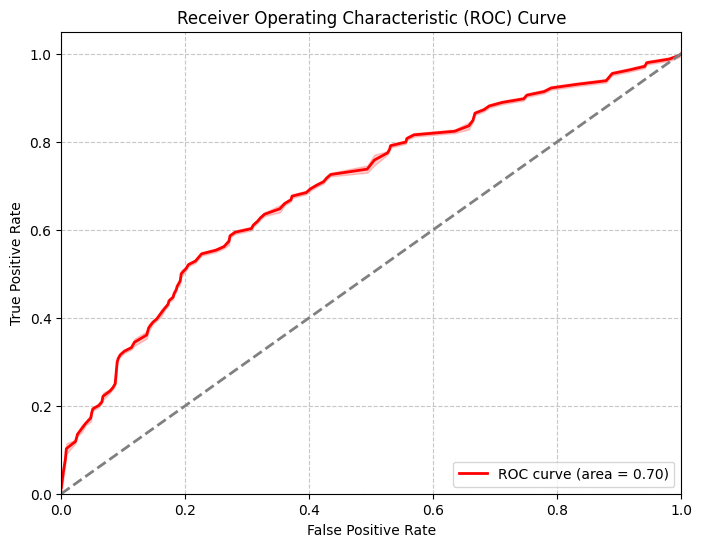

In [45]:
# Extract probabilities for the positive class
y_scores = gb_classifier.predict_proba(X_test)[:, 1] 

# Call the function to plot the ROC curve
plot_roc_curve(y_test, y_scores)

## Model Comperision

In [47]:
# List of models and their corresponding names
models = [
    ('Logistic Regression', logistic_regression_classifier),
    ('SVM', svm_classifier),
    ('Naive Bayes', nb_classifier),
    ('Decision Tree', dt_classifier),
    ('Gradient Boosting', gb_classifier),
]


                     Accuracy  Precision    Recall  F1 Score   ROC AUC  \
Logistic Regression  0.838798   0.864927  0.838798  0.770423  0.730744   
SVM                  0.837432   0.803769  0.837432  0.778469  0.580798   
Naive Bayes          0.834699   0.862061  0.834699  0.760851  0.725060   
Decision Tree        0.823770   0.733872  0.823770  0.759853  0.653937   
Gradient Boosting    0.837432   0.831408  0.837432  0.769661  0.696762   

                      Avg FPR  
Logistic Regression  0.316761  
SVM                  0.446055  
Naive Bayes          0.331751  
Decision Tree        0.348270  
Gradient Boosting    0.353488  


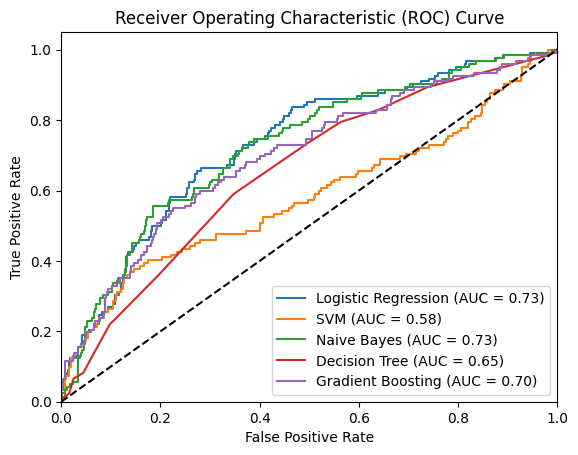

In [48]:
results = {}

# Loop through each model to calculate metrics
for model_name, model in models:
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the metrics
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }

    # If the model supports probability predictions, calculate ROC AUC and plot ROC curve
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
        roc_auc = roc_auc_score(y_test, y_scores)
        fpr, tpr, _ = roc_curve(y_test, y_scores)

        # Calculate the average FPR
        avg_fpr = np.mean(fpr)

        # Store ROC AUC and average FPR score
        results[model_name]['ROC AUC'] = roc_auc
        results[model_name]['Avg FPR'] = avg_fpr
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T  # Transpose for better readability

# Print the results as a table
print(results_df)

# Finalize the ROC plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

The table compares classifiers based on their accuracy, precision, recall, F1 score, ROC AUC, and average false positive rate (Avg FPR). Logistic Regression has the best accuracy (83.88%) and precision, followed by Gradient Boosting and SVM. The Decision Tree classifier scores poorly across most parameters, suggesting overfitting or insufficient pattern recognition skills, while Logistic regression exhibits balanced performance with the lowest Avg FPR (31.68%). With Logistic Regression and Naive Bayes outperforming the rest, ROC AUC values demonstrate the models' discriminatory capability.

### Model Analysis

The best accuracy, precision, and ROC AUC are attained by logistic regression, which makes it a compelling option for use in this circumstance. Despite achieving comparable accuracy, SVM is less dependable for medical data due to its lower ROC AUC (58.08%) and higher Avg FPR. With the second-best ROC AUC (72.51%) and lowest Avg FPR, Naive Bayes strikes a good balance between performance metrics, showing robustness in classification. Because it either overfits or isn't sufficiently accurate for the dataset, Decision Tree performs noticeably worse. As demonstrated by its higher average FPR and lower ROC AUC (69.39%), gradient boosting performs slightly poorly in discrimination power than logistic regression, but it performs similarly in accuracy and recall.

## Conclusion

Logistic Regression is the best model, with the highest accuracy (83.88%) and precision, as well as a high ROC AUC (73.07%) and a low average FPR (31.68%). However, performance measures across all models point to dataset limitations, such as insufficient size or class imbalance. For healthcare uses, these restrictions could affect prediction reliability. While Logistic Regression outperforms the other models, the results show that more data and improved dataset preparation are required to guarantee applicability for medical purposes. Without resolving these constraints, applying these models in real-life situations would be inappropriate and possibly harmful. In order to meet the high clinical standards, accurate validation and calibration are required.